In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [ ]:
file_path = 'FILE_PATH_PLACEHOLDER'

In [38]:
data = pd.read_csv(file_path)

In [5]:
def statistics(minerals):
  min_dict = {}
  for mineral in data[minerals]:
    count = data[mineral].count()
    std = data[mineral].std()
    max = data[mineral].max()
    min = data[mineral].min()
    mean = data[mineral].mean()
    mean_plus_10 = mean + (mean * 10/100)
    mean_minus_10 = mean - (mean * 10/100)
    ok_at_10 = np.sum(data[mineral] < mean_plus_10) - np.sum(data[mineral] <= mean_minus_10)
    failure_greater_10 = count - ok_at_10
    percent_failure_greater_10 = math.ceil((failure_greater_10 / count) * 100)
    mean_plus_minus_10 = f"{mean.round(2)} ± {((10/100)*mean).round(2)}"
    mean_plus_2SD = mean + (std * 2)
    mean_minus_2SD = mean - (std * 2)
    ok_at_2SD = np.sum(data[mineral] <= mean_plus_2SD) - np.sum(data[mineral] < mean_minus_2SD)
    failure_greater_2SD = count - ok_at_2SD
    percent_failure_greater_2SD = math.ceil((failure_greater_2SD / count) * 100)
    mean_plus_minus_2SD = f"{mean.round(2)} ± {((2*std)/mean).round(2)}"
    mean_plus_3SD = mean + (std * 3)
    mean_minus_3SD = mean - (std * 3)
    ok_at_3SD = np.sum(data[mineral] <= mean_plus_3SD) - np.sum(data[mineral] < mean_minus_3SD)
    failure_greater_3SD = count - ok_at_3SD
    percent_failure_greater_3SD = math.ceil((failure_greater_3SD / count) * 100)
    mean_plus_minus_3SD = f"{mean.round(2)} ± {((3*std)/mean).round(2)}"
    RSD = (std / mean) * 100
    RSD = round(RSD, 2)
    certification = 'Certified' if RSD <= 5 else 'Provisional' if RSD > 5 and RSD <= 15 else  'Informational'
    acceptable_qc = 'Pass' if percent_failure_greater_10 <= 10 and RSD <= 15 else 'Fail'
    TwoSD_less_than_10 = '2SD > 10%' if (2 * std) > (0.1 * mean)  else 'yes'

    #print(mineral, 'count:', count, 'std:', std, 'max:', max, 'min:', min, 'mean:', mean, 'mean + 10%:', mean_plus_10, 'mean - 10%: ', mean_minus_10, 'mean + 2D: ', mean_plus_2SD, 'mean - 2D: ', mean_minus_2SD)
    min_dict[mineral] = [count, std, max, min, mean, mean_plus_10, mean_minus_10, ok_at_10, failure_greater_10, percent_failure_greater_10, mean_plus_minus_10, mean_plus_2SD, mean_minus_2SD, ok_at_2SD, failure_greater_2SD, percent_failure_greater_2SD, mean_plus_minus_2SD, mean_plus_3SD, mean_minus_3SD,
                         ok_at_3SD, failure_greater_3SD, percent_failure_greater_3SD, mean_minus_3SD, RSD, certification, acceptable_qc, TwoSD_less_than_10]
  return min_dict


<h1>Statistics</h1>




In [40]:
stat_data = ['Ag', 'Au', 'Cu', 'Pb', 'Zn']
stats = statistics(stat_data)
stats_df = pd.DataFrame.from_dict(stats, orient='index', columns=['count', 'std', 'max', 'min', 'mean', 'mean + 10%', 'mean - 10%', 'Ok @ 10', 'Failures > 10%', '% Failures > 10%', 'Mean ± 10%', 'mean + 2SD', 'mean - 2SD', 'Ok @ 2SD', 'Failures > 2SD', '% Failures > 2SD', 'Mean ± 2SD', 'mean + 3SD', 'mean - 3SD', 'Ok @ 3SD', 'Failures > 3SD', '% Failures > 3SD', 'Mean ± 3SD',
                                                                  'RSD', 'Certification' , 'Acceptable QC?', '2SD < 10%'])
stats_df

,count,std,max,min,mean,mean + 10%,mean - 10%,Ok @ 10,Failures > 10%,% Failures > 10%,...,mean + 3SD,mean - 3SD,Ok @ 3SD,Failures > 3SD,% Failures > 3SD,Mean ± 3SD,RSD,Certification,Acceptable QC?,2SD < 10%
Ag,19,0.000000,0.250,0.2500,0.250000,0.275000,0.225000,19,0,0,...,0.250000,0.250000,19,0,0,0.250000,0.00,Certified,Pass,yes
Au,19,0.030301,0.142,0.0025,0.126605,0.139266,0.113945,16,3,16,...,0.217507,0.035703,18,1,6,0.035703,23.93,Informational,Fail,2SD > 10%
Cu,19,0.991189,25.000,21.0000,23.736842,26.110526,21.363158,18,1,6,...,26.710410,20.763274,19,0,0,20.763274,4.18,Certified,Pass,yes
Pb,19,2.181796,31.000,23.0000,28.736842,31.610526,25.863158,18,1,6,...,35.282230,22.191454,19,0,0,22.191454,7.59,Provisional,Pass,2SD > 10%
Zn,19,1.806421,47.000,41.0000,44.473684,48.921053,40.026316,19,0,0,...,49.892948,39.054420,19,0,0,39.054420,4.06,Certified,Pass,yes


In [41]:
sequence = list(range(0,data.shape[0]))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

In [42]:
def plot_stats_sequence(minerals):
  for mineral in data[minerals]:
    plt.figure(figsize=(20, 10))
    sns.set_style("darkgrid")
    plt.title(f"Evelyn Project {data['Original QC'][0]} {data['Standard'][0]} @ {data['Lab'][0]}")
    sns.lineplot(x=sequence, y=stats_df['mean'][mineral], label='mean')
    sns.pointplot(x=sequence, y=data[mineral], color='red', label='Analysis')
    sns.lineplot(x=sequence, y=stats_df['mean + 10%'][mineral], linestyle='--', color='red', label='mean + 10%')
    sns.lineplot(x=sequence, y=stats_df['mean - 10%'][mineral], linestyle='--', color='red', label='mean - 10%')
    sns.lineplot(x=sequence, y=stats_df['mean + 2SD'][mineral], linestyle='--', color='blue', label='mean + 2SD')
    sns.lineplot(x=sequence, y=stats_df['mean - 2SD'][mineral], linestyle='--', color='blue', label='mean - 2SD')
    sns.lineplot(x=sequence, y=stats_df['mean + 3SD'][mineral], linestyle='--', color='green', label='mean + 3SD')
    sns.lineplot(x=sequence, y=stats_df['mean - 3SD'][mineral], linestyle='--', color='green', label='mean - 3SD')
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.xlabel('Sequence Number')
    plt.ylabel(mineral[:2])
    plt.show()

<h1>Graphs</h1>

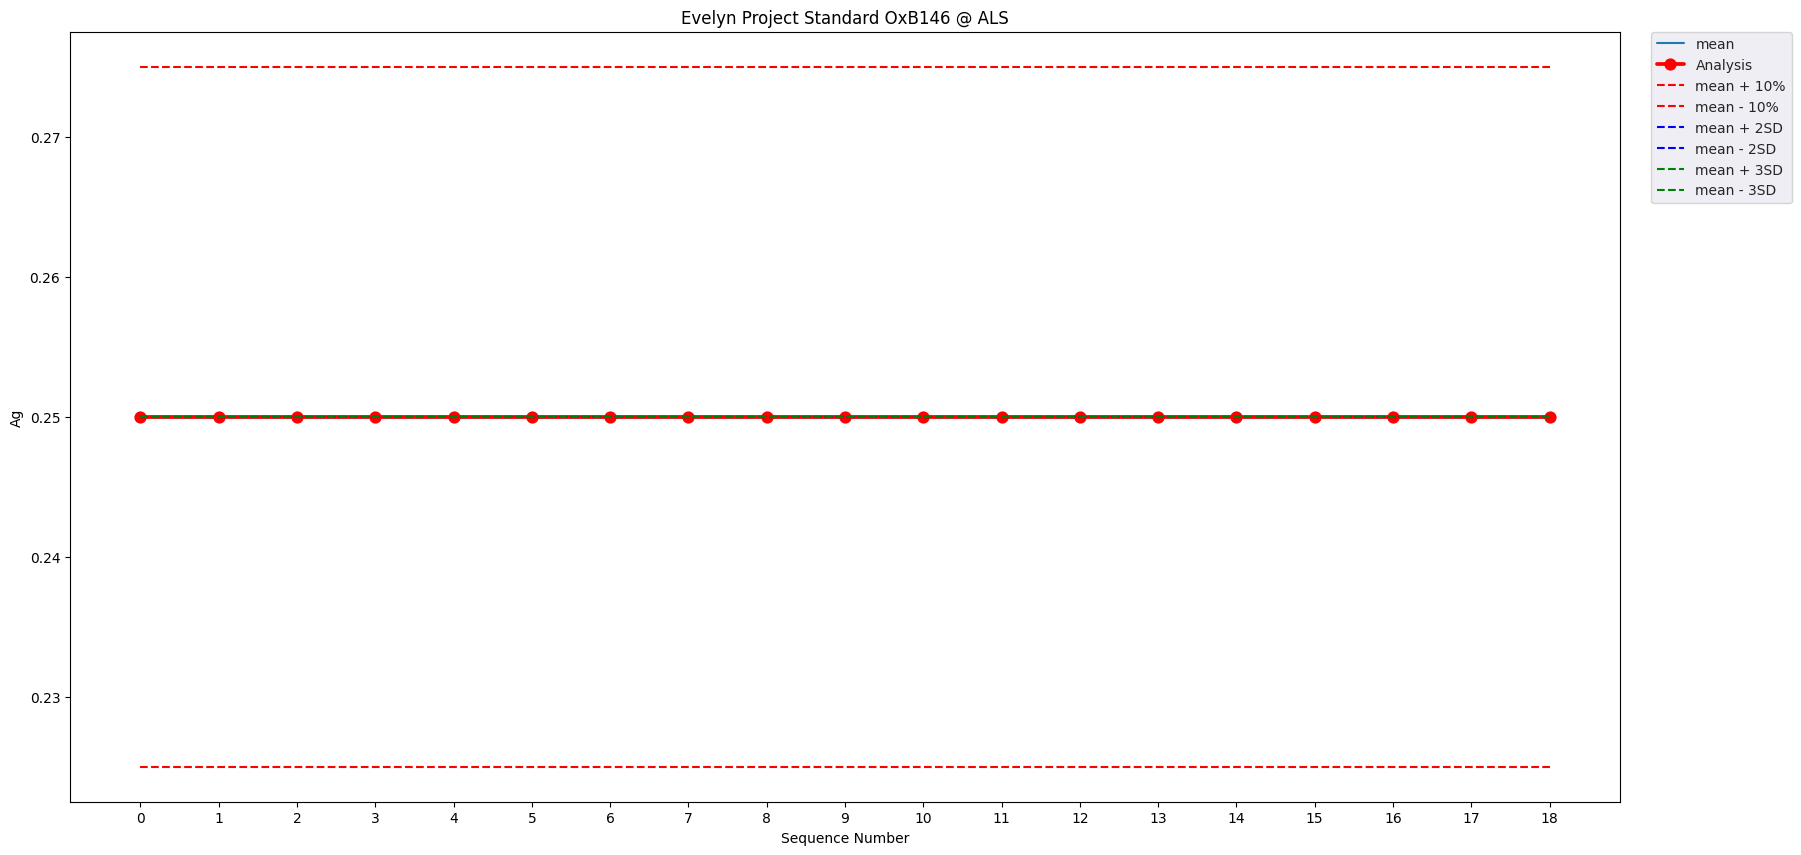

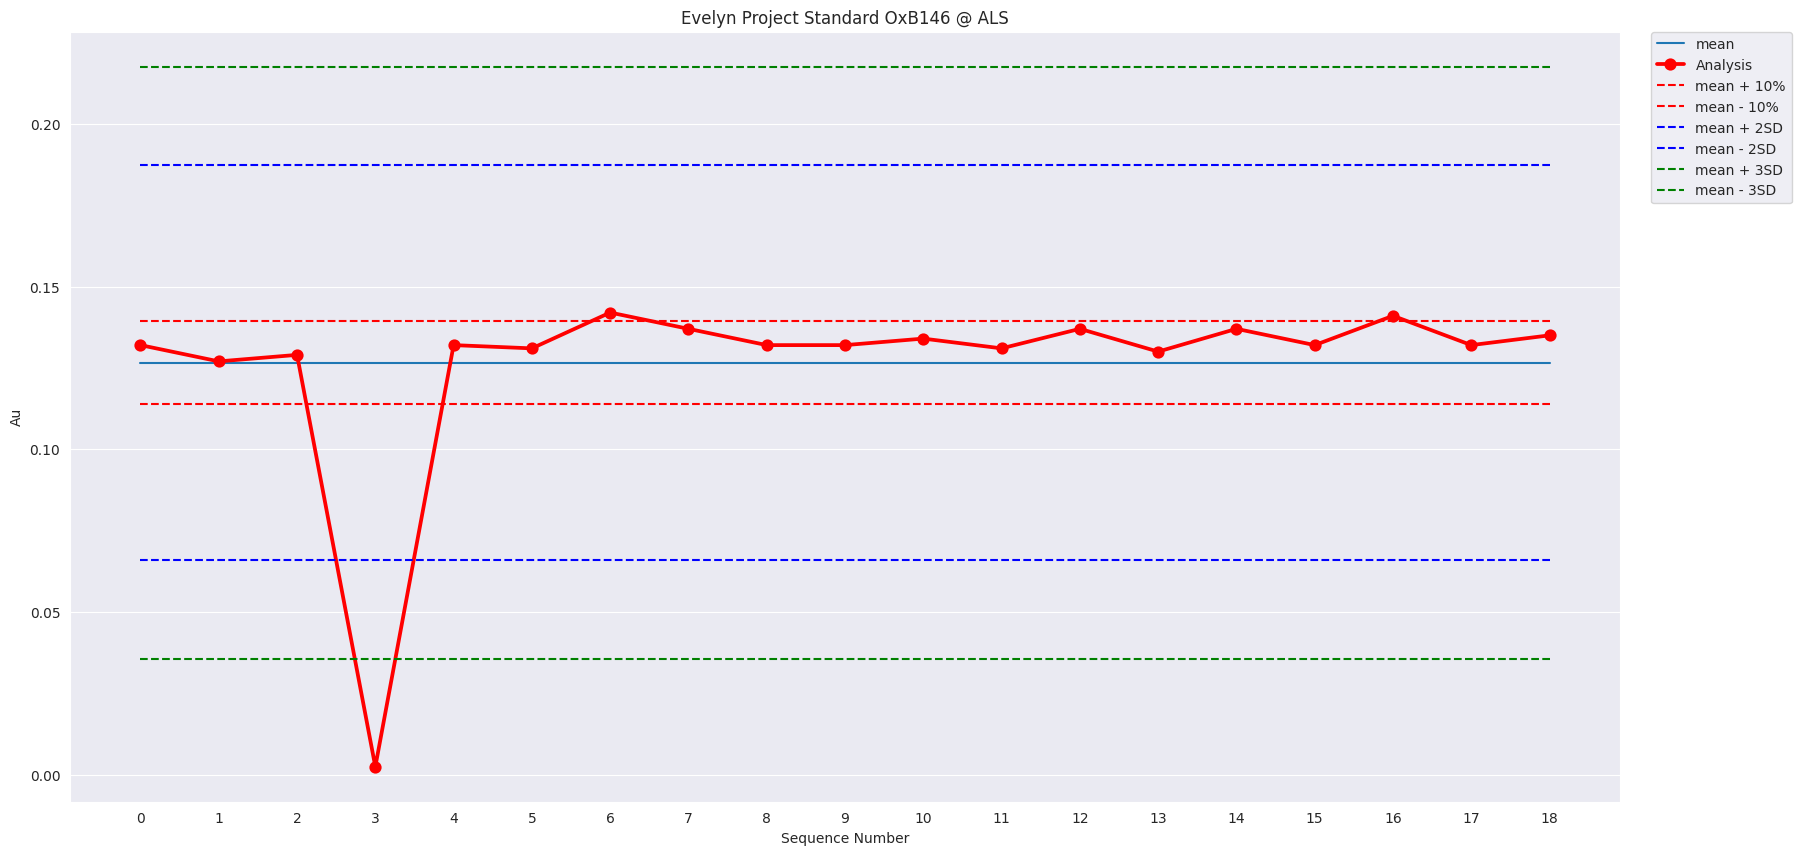

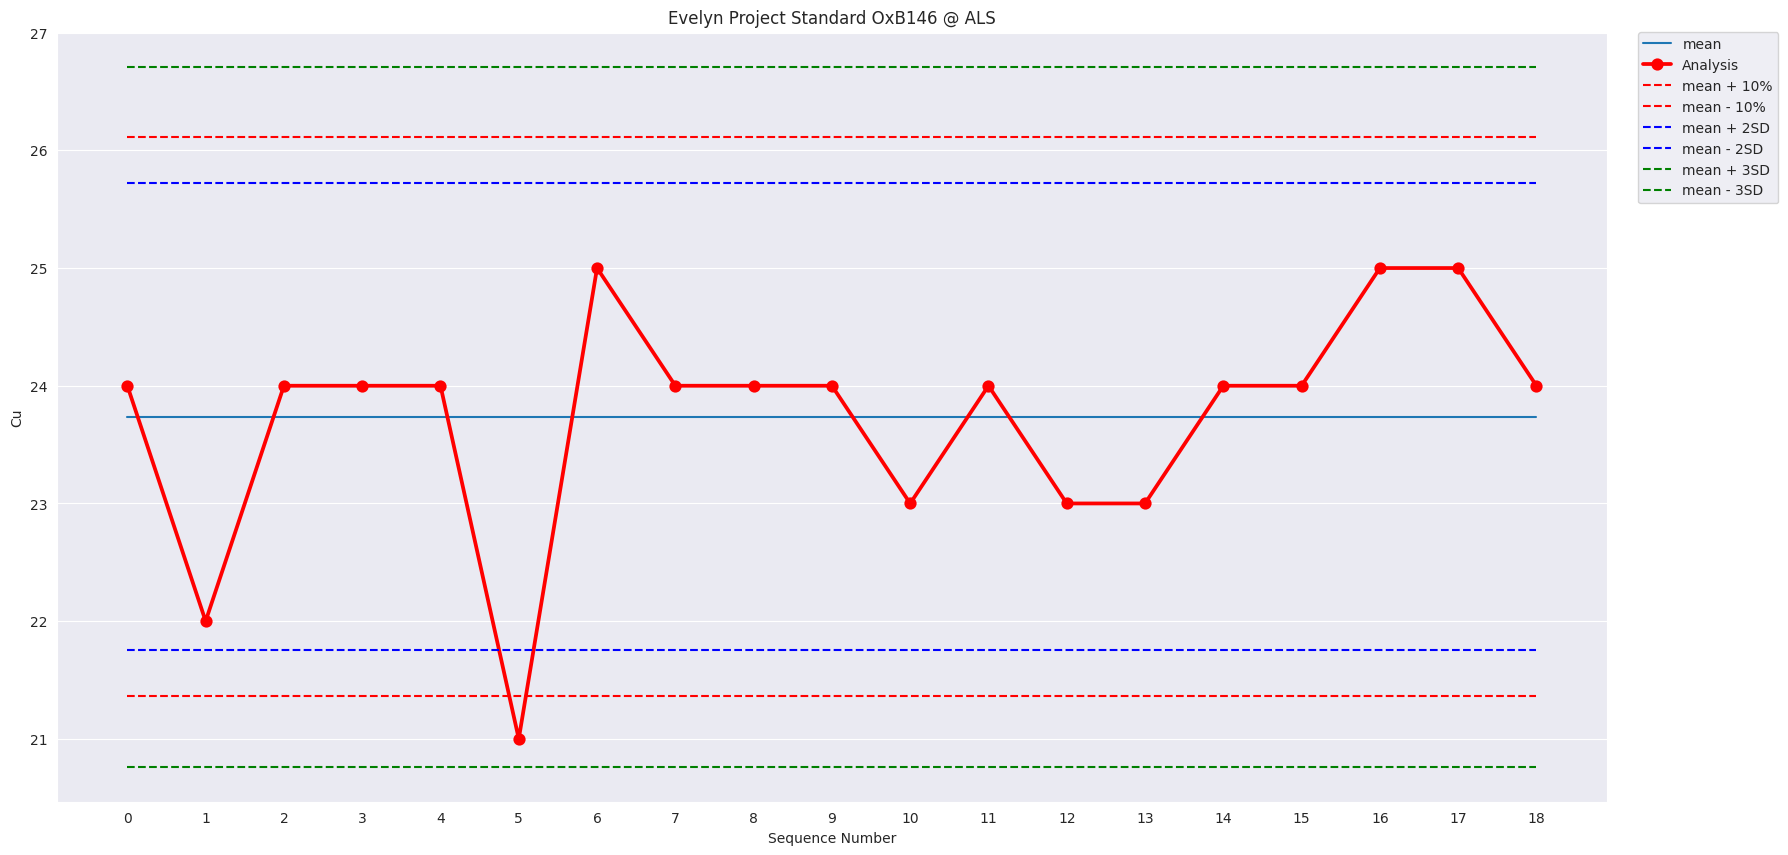

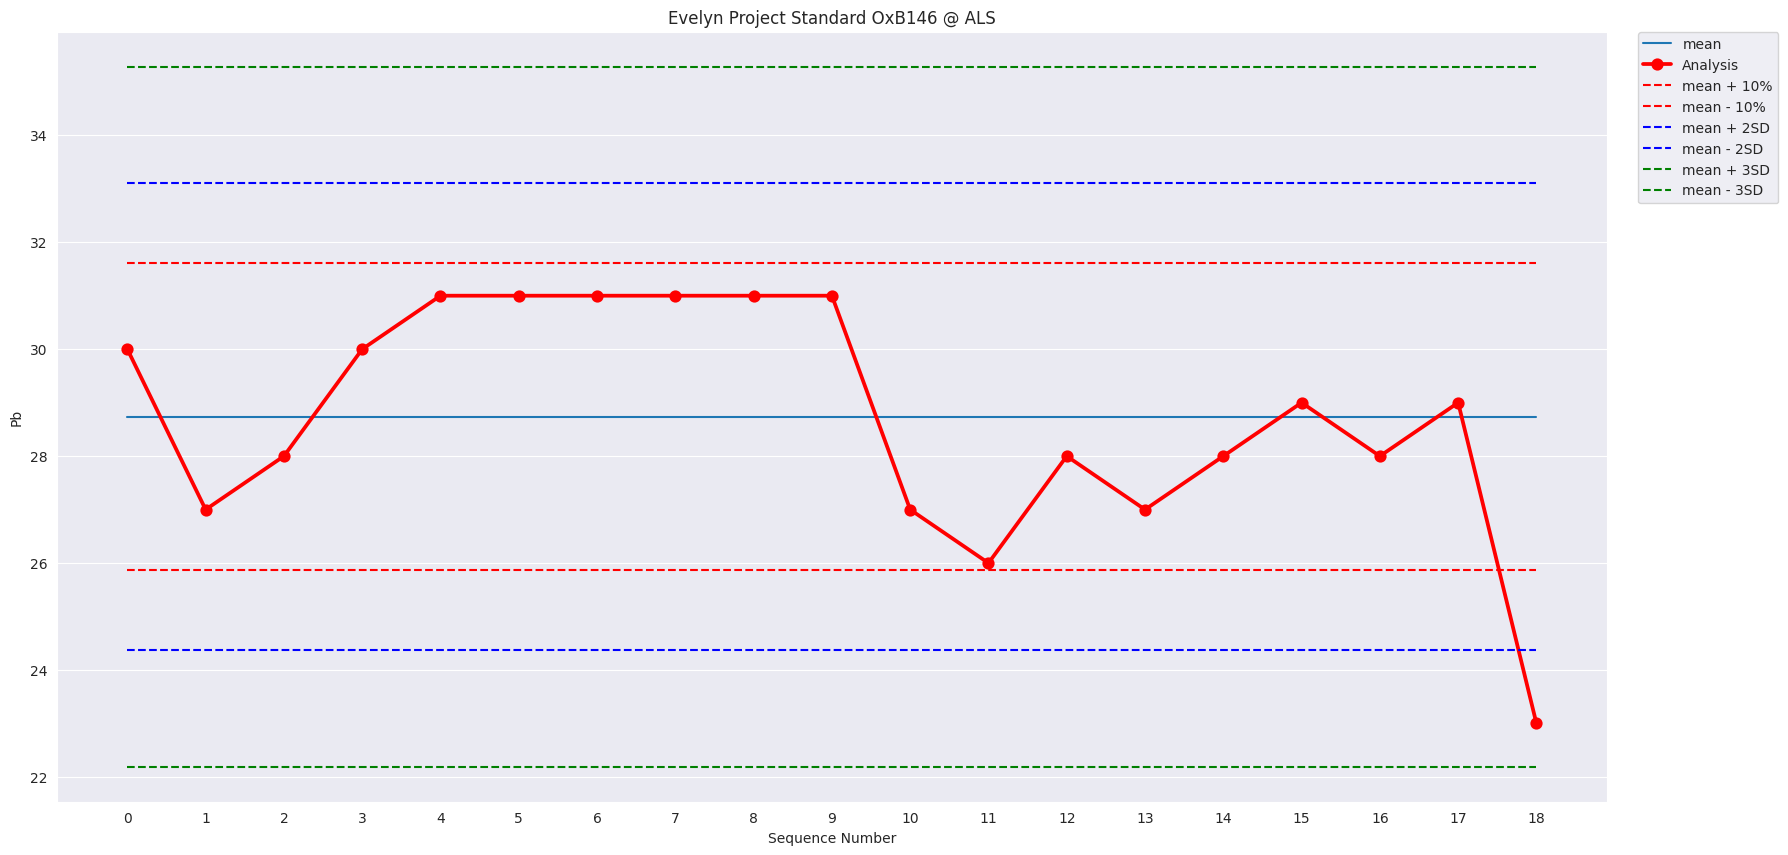

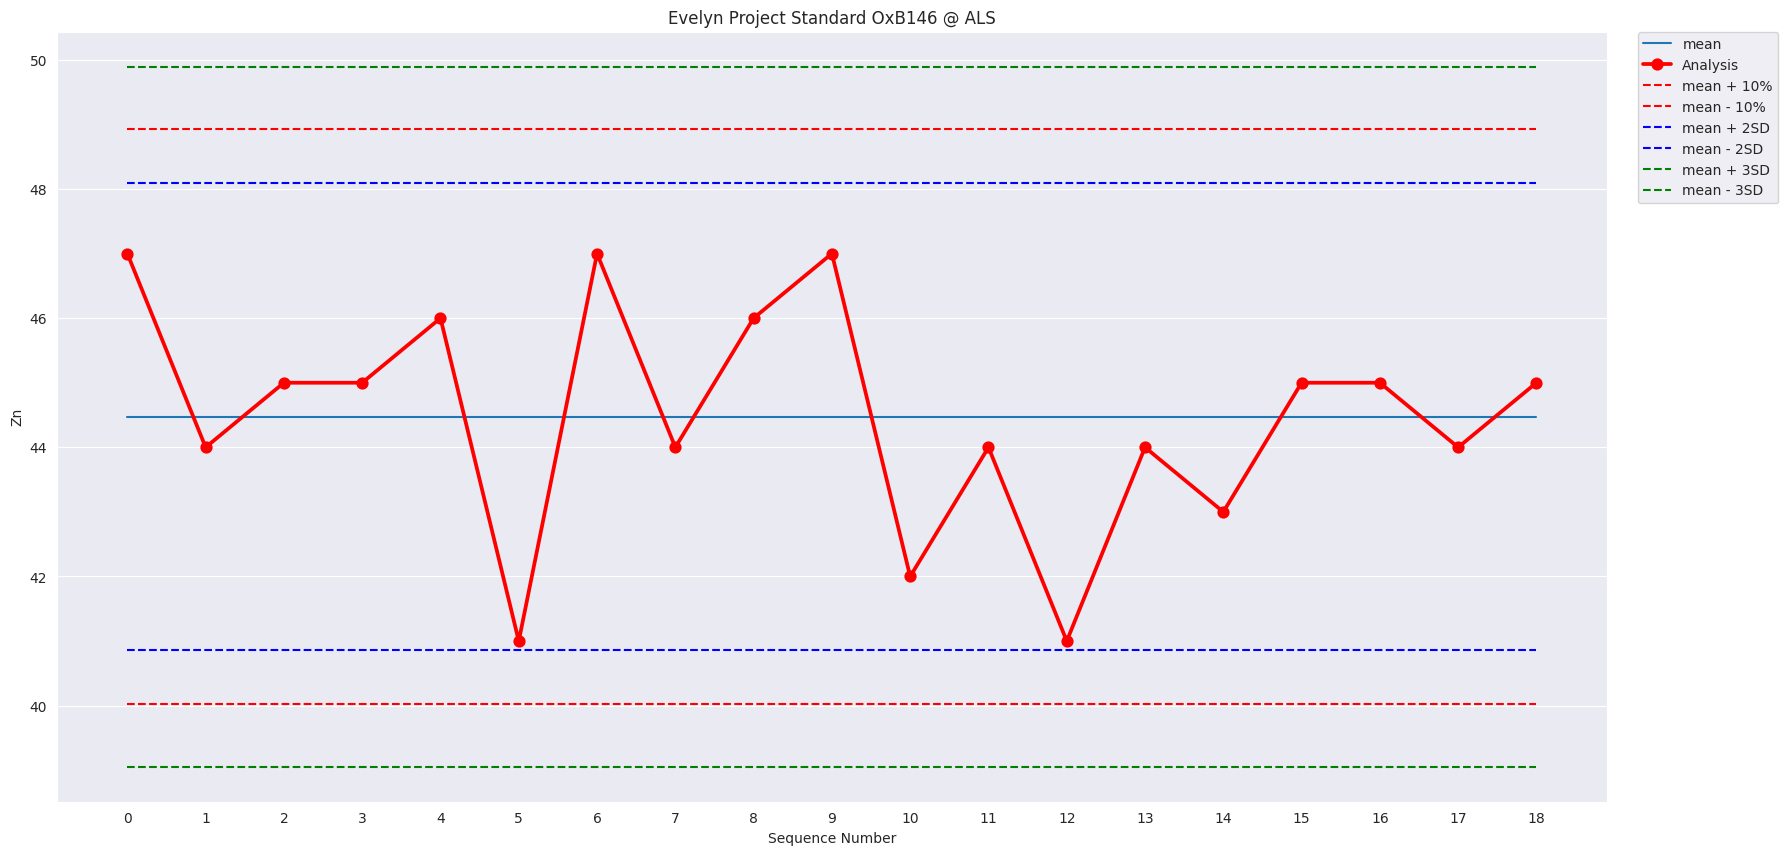

In [10]:
plot_stats_sequence(stat_data)


In [13]:

def plot_stats_dates(minerals):
  for mineral in data[minerals]:
    plt.figure(figsize=(20, 10))
    sns.set_style("darkgrid")
    plt.title('Evelyn Project Standard OxJ161 @ ALS')
    sns.lineplot(x=data['Cert Date'], y=stats_df['mean'][mineral], label='mean')
    sns.scatterplot(x=data['Cert Date'], y=data[mineral], color='red', label='Analysis')
    sns.lineplot(x=data['Cert Date'], y=stats_df['mean + 10%'][mineral], linestyle='--', color='red', label='mean + 10%')
    sns.lineplot(x=data['Cert Date'], y=stats_df['mean - 10%'][mineral], linestyle='--', color='red', label='mean - 10%')
    sns.lineplot(x=data['Cert Date'], y=stats_df['mean + 2SD'][mineral], linestyle='--', color='blue', label='mean + 2SD')
    sns.lineplot(x=data['Cert Date'], y=stats_df['mean - 2SD'][mineral], linestyle='--', color='blue', label='mean - 2SD')
    sns.lineplot(x=data['Cert Date'], y=stats_df['mean + 3SD'][mineral], linestyle='--', color='green', label='mean + 3SD')
    sns.lineplot(x=data['Cert Date'], y=stats_df['mean - 3SD'][mineral], linestyle='--', color='green', label='mean - 3SD')
    plt.legend( bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.xlabel('Date')
    plt.ylabel(mineral[:2])
    plt.show()

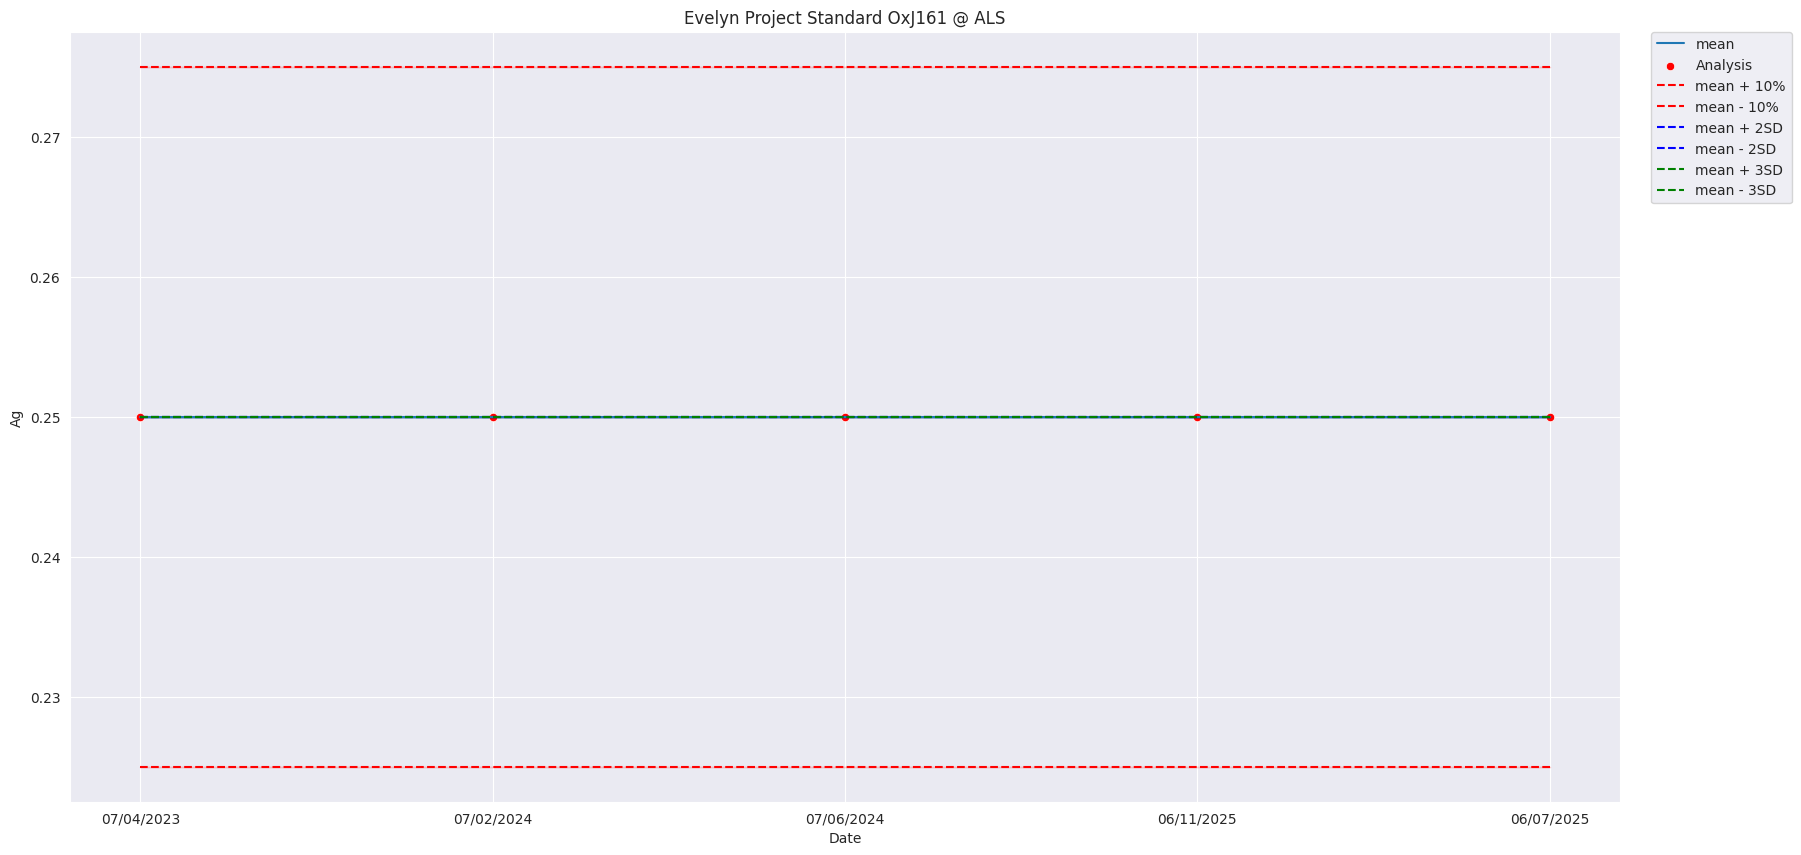

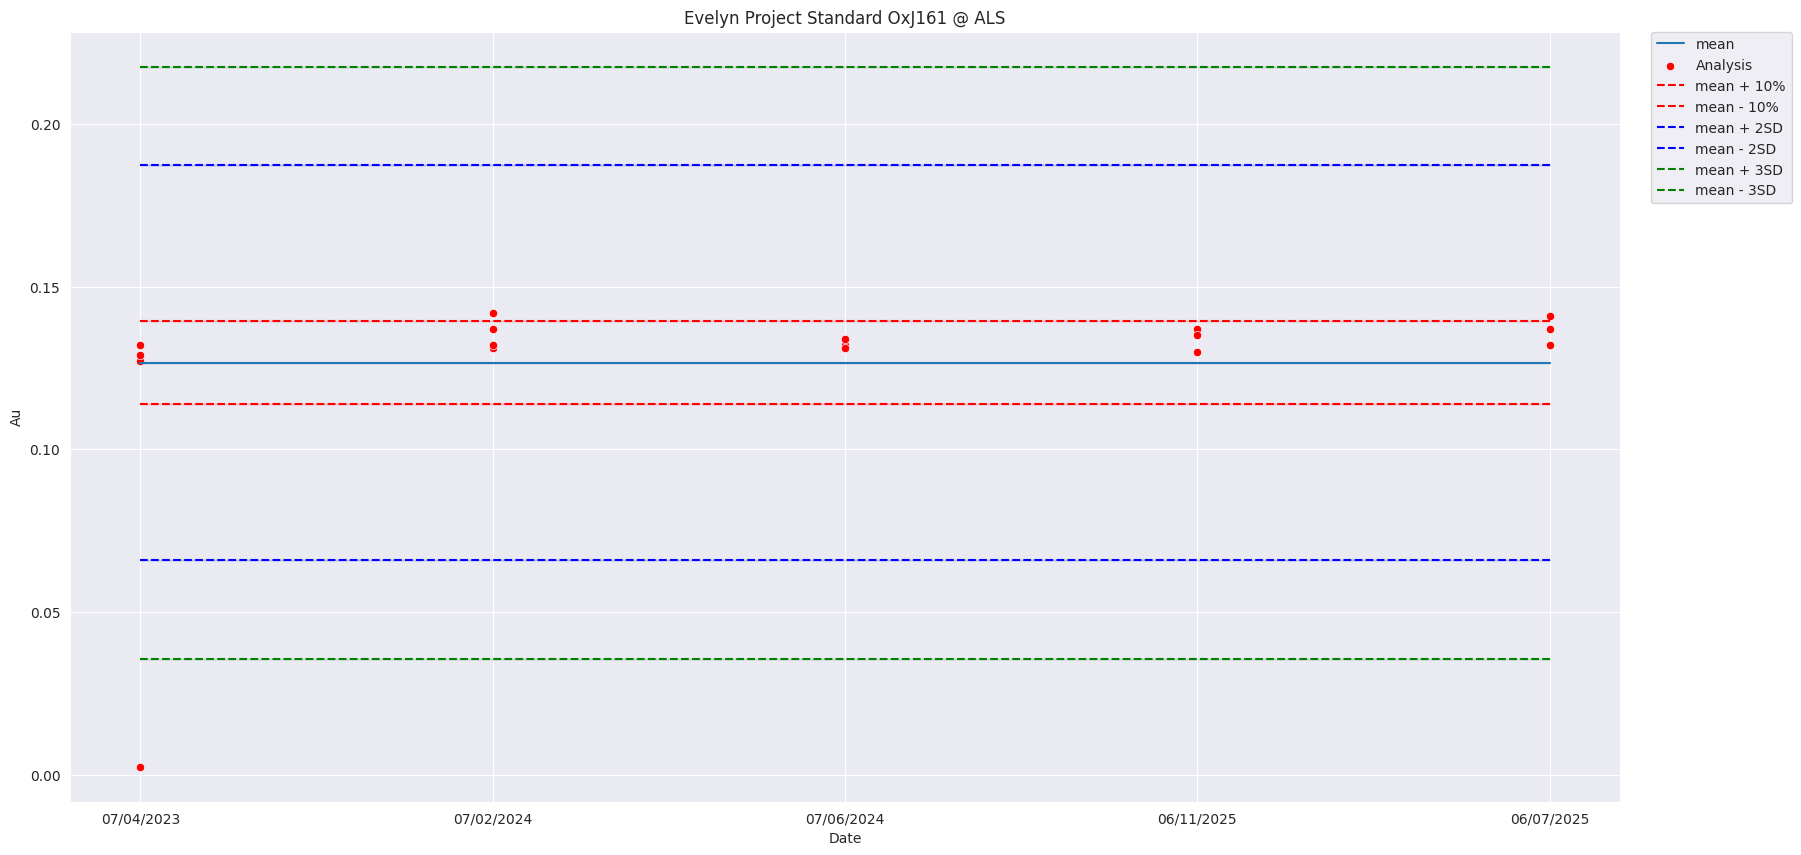

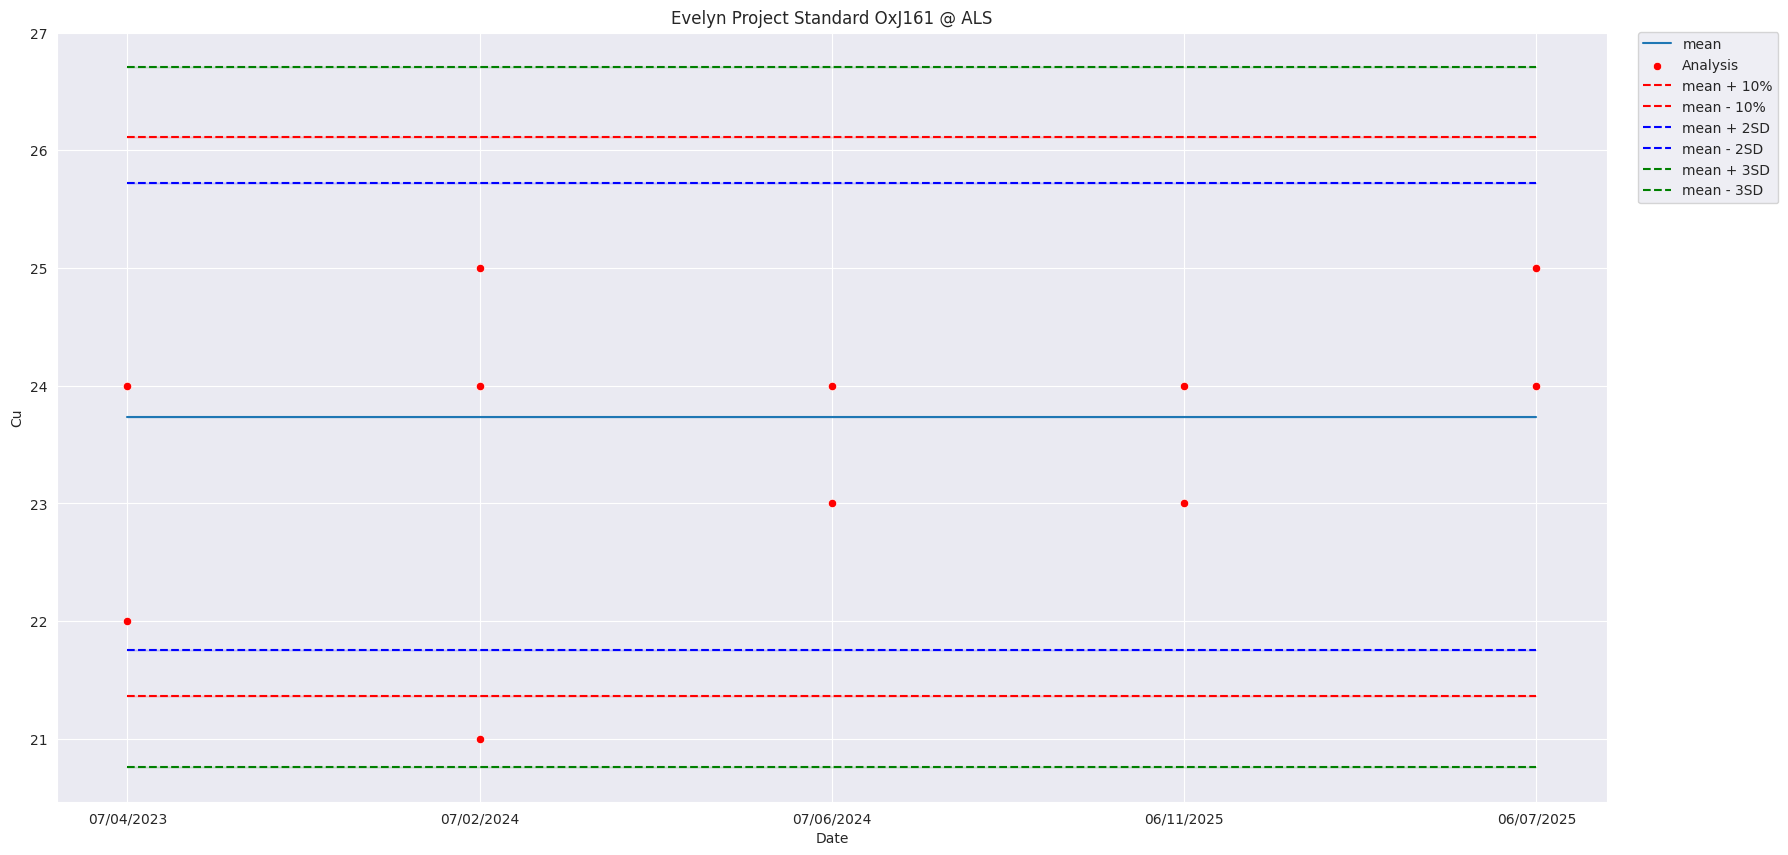

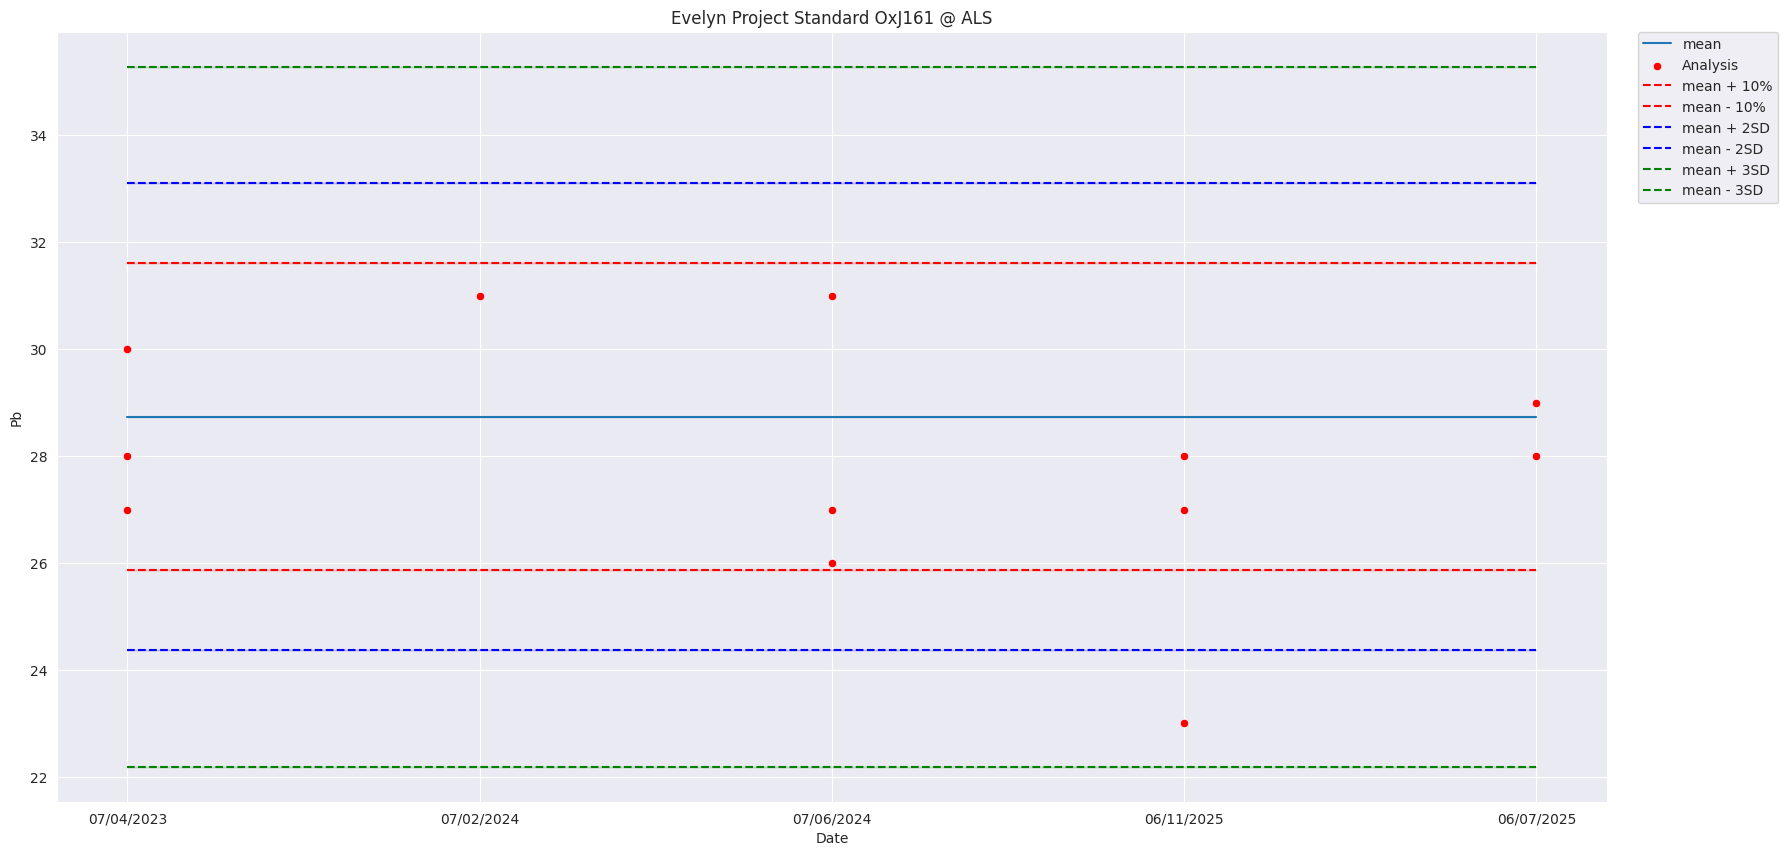

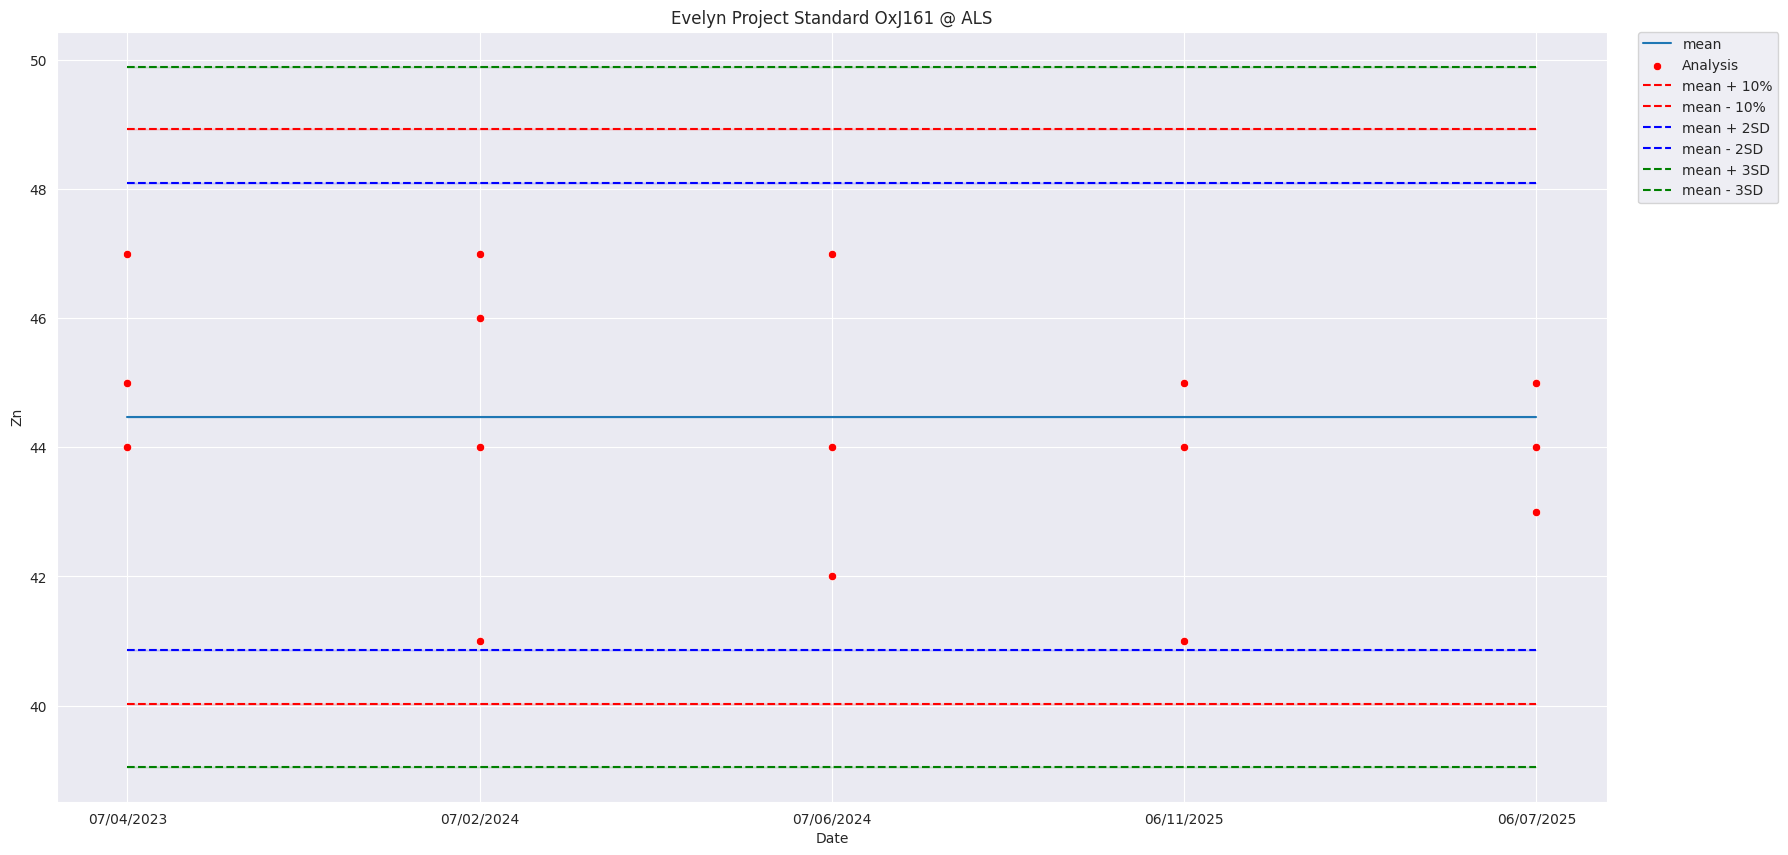

In [14]:
plot_stats_dates(stat_data)
#